In [1]:
pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


# 1. 교차검증

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd 

In [2]:
iris=load_iris()
iris_data=iris.data
iris_label=iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris_df['label']=iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X_train, X_test, Y_train, Y_test=train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [6]:
#DecisionTreeClassifier 
dt_clf=DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=11)

In [7]:
pred=dt_clf.predict(X_test)

In [13]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(Y_test,pred)))

예측 정확도: 0.9333


## 2) k-fold 교차검증

In [16]:
kfold=KFold(n_splits=5)
cv_accuracy=[]
print('붓꽃 데이터 세트 크기:',iris_data.shape[0])

n_iter=0
for train_index, test_index in kfold.split(iris_data):
    X_train, X_test = iris_data[train_index],iris_data[test_index] 
    y_train, y_test = iris_label[train_index],iris_label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    n_iter+=1
    #반복 시마다 정확도 측정
    accuracy=np.round(accuracy_score(y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차검증 정확도 :{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
print('\n## 평균 검증 정확도:',np.mean(cv_accuracy))


붓꽃 데이터 세트 크기: 150

#1 교차검증 정확도 :1.0, 학습 데이터 크기:120, 검증 데이터 크기:30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차검증 정확도 :0.9667, 학습 데이터 크기:120, 검증 데이터 크기:30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차검증 정확도 :0.8667, 학습 데이터 크기:120, 검증 데이터 크기:30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차검증 정확도 :0.9333, 학습 데이터 크기:120, 검증 데이터 크기:30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차검증 정확도 :0.8333, 학습 데이터 크기:120, 검증 데이터 크기:30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9200000000000002


## 3) stratified K 폴드

In [7]:
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [12]:
kfold=KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_data):
    n_iter+=1
    label_train=iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print(f'## 교차검증:{n_iter}')
    print('학습 레이블 데이터 분포 :\n',label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n',label_test.value_counts())

## 교차검증:1
학습 레이블 데이터 분포 :
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    50
Name: label, dtype: int64
## 교차검증:2
학습 레이블 데이터 분포 :
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    50
Name: label, dtype: int64
## 교차검증:3
학습 레이블 데이터 분포 :
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    50
Name: label, dtype: int64


In [14]:
from sklearn.model_selection import StratifiedKFold

#label의 분포가 서로 동일한 것을 확인
skf=StratifiedKFold(n_splits=3)
n_iter=0
for train_index, test_index in skf.split(iris_df,iris_df['label']):
    n_iter+=1
    label_train=iris_df['label'].iloc[train_index]
    label_test=iris_df['label'].iloc[test_index]
    print(f'## 교차검증:{n_iter}')
    print('학습 레이블 데이터 분포 :\n',label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n',label_test.value_counts())

## 교차검증:1
학습 레이블 데이터 분포 :
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차검증:2
학습 레이블 데이터 분포 :
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차검증:3
학습 레이블 데이터 분포 :
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    17
2    17
0    16
Name: label, dtype: int64


In [15]:
#최종 모델 : 분류에서만 사용
#DecisionTreeClassifier 
dt_clf=DecisionTreeClassifier(random_state=156)

skf=StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index in skf.split(iris_data,iris_label):
    X_train, X_test = iris_data[train_index],iris_data[test_index] 
    y_train, y_test = iris_label[train_index],iris_label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    n_iter+=1
    #반복 시마다 정확도 측정
    accuracy=np.round(accuracy_score(y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차검증 정확도 :{1}, 학습 데이터 크기:{2}, 검증 데이터 크기:{3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
print('\n## 교차 검증별 정확도:',np.round(cv_accuracy,4))
print('## 평균 검증 정확도:',np.round(np.mean(cv_accuracy),4))



#1 교차검증 정확도 :0.98, 학습 데이터 크기:100, 검증 데이터 크기:50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차검증 정확도 :0.94, 학습 데이터 크기:100, 검증 데이터 크기:50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차검증 정확도 :0.98, 학습 데이터 크기:100, 검증 데이터 크기:50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


## 4) 교차검증 api : 내부적으로 stratifiedKFOLD 사용
- cross_validate() :여러개 평가 지표 사용가능

In [19]:
from sklearn.model_selection import cross_val_score, cross_validate

dt_clf=DecisionTreeClassifier(random_state=156)

data= iris.data
label= iris.target

scores=cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3) #교차검증3
print('교차 검증별 정확도 :',  np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


## 5) GridSearchCV : 교차검증과 최적 하이퍼 파라미터 튜닝을 한번에

In [20]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=121)

d_tree= DecisionTreeClassifier()

grid_parameters={'max_depth':[1,2,3],
                 'min_samples_split':[2,3]}

grid_dtree=GridSearchCV(d_tree, param_grid=grid_parameters, cv=3, refit=True) #refir=True 면, 가장 좋은 파라미터 설정으로 재학습

grid_dtree.fit(X_train, y_train)

scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
           'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [22]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [24]:
estimator=grid_dtree.best_estimator_

pred=estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도:0.9667


# 2. 데이터 전처리

### 1) 데이터 인코딩

In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder=LabelEncoder()
encoder.fit(items)

labels=encoder.transform(items)
print('인코더 변환값:',labels)

인코더 변환값: [0 1 4 5 3 3 2 2]


In [2]:
print('인코딩 클래스:', encoder.classes_)
print('디코딩의 원본값:',encoder.inverse_transform(labels))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [3]:
print('디코딩의 원본값:',encoder.inverse_transform(labels))

디코딩의 원본값: ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


### 2) 원핫인코딩

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

#2차원 ndarry로 변환
items=np.array(items).reshape(-1,1)
items

array([['TV'],
       ['냉장고'],
       ['전자레인지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U5')

In [7]:
oh_encoder=OneHotEncoder()
oh_encoder.fit(items)
oh_labels= oh_encoder.transform(items)

print(oh_labels.shape)
oh_labels.toarray()


(8, 6)


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [9]:
import pandas as pd
df=pd.DataFrame({'items':['TV', '냉장고', '전자레인지', '컴퓨터' ,'선풍기' ,'선풍기' ,'믹서' ,'믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 3) 스케일링

In [11]:
from sklearn.datasets import load_iris
import pandas as pd
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('평균: ',iris_df.mean())
print('분산: ',iris_df.var())

평균:  sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
분산:  sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

iris_df_scaled= pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('평균: ', iris_df_scaled.mean())
print('분산: ', iris_df_scaled.var())

평균:  sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
분산:  sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('최솟값: ', iris_df_scaled.min())
print('최댓값: ', iris_df_scaled.max())

최솟값:  sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
최댓값:  sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [15]:
from sklearn.preprocessing import MinMaxScaler

#2차원 이상만 가능
train_array= np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled= scaler.transform(train_array)

print('원본: ', np.round(train_array.reshape(-1),2))
print('scaled: ', np.round(train_scaled.reshape(-1),2))

원본:  [ 0  1  2  3  4  5  6  7  8  9 10]
scaled:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [16]:
test_scaled= scaler.transform(test_array)

print('원본: ', np.round(test_array.reshape(-1),2))
print('scaled: ', np.round(test_scaled.reshape(-1),2))

원본:  [0 1 2 3 4 5]
scaled:  [0.  0.1 0.2 0.3 0.4 0.5]


In [17]:
train_array= np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

scaler=MinMaxScaler()
train_scaled= scaler.fit_transform(train_array)


print('train 원본: ', np.round(train_array.reshape(-1),2))
print('train scaled: ', np.round(train_scaled.reshape(-1),2))

test_scaled= scaler.transform(test_array)

print('test 원본: ', np.round(test_array.reshape(-1),2))
print('test scaled: ', np.round(test_scaled.reshape(-1),2))

train 원본:  [ 0  1  2  3  4  5  6  7  8  9 10]
train scaled:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
test 원본:  [0 1 2 3 4 5]
test scaled:  [0.  0.1 0.2 0.3 0.4 0.5]


# 결정트리

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
#DecisionTreeClassifier 
dt_clf=DecisionTreeClassifier(random_state=11)
iris_data=load_iris()
X_train, X_test, Y_train, Y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=11)

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

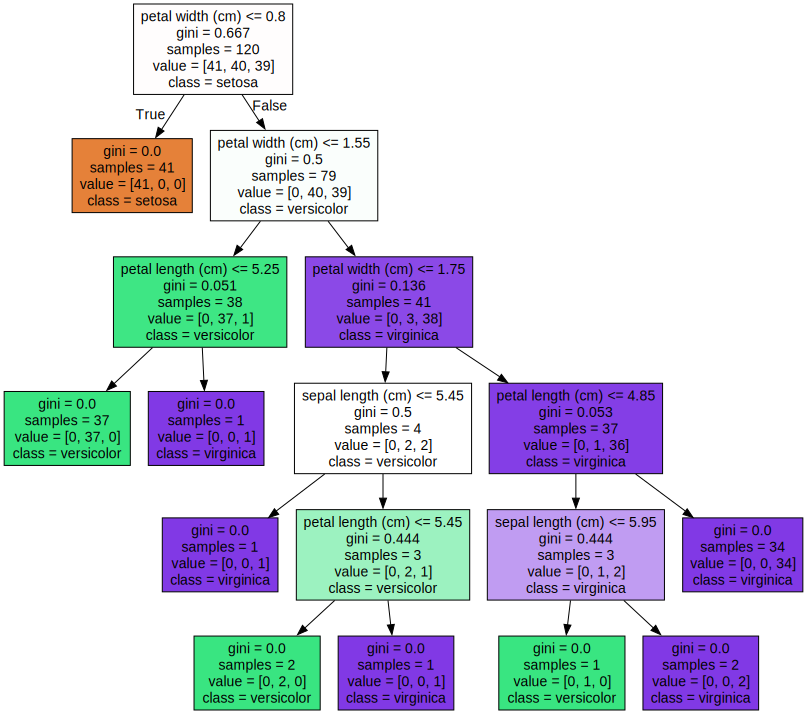

In [6]:
import graphviz
with open('tree.dot') as f:
    dot_grapg=f.read()
graphviz.Source(dot_grapg)

<AxesSubplot:>

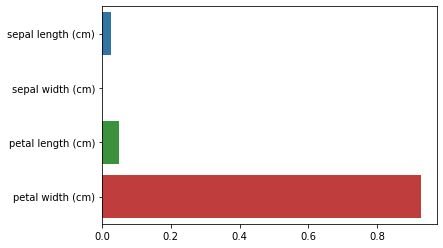

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

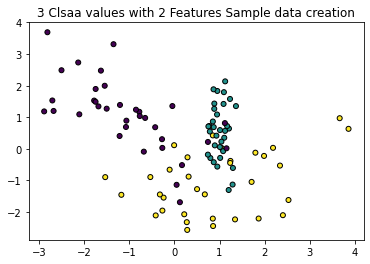

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Clsaa values with 2 Features Sample data creation")

X_feature, y_label=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)
plt.scatter(X_feature[:,0],X_feature[:,1],marker='o',c=y_label, s=25, edgecolors='k')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 기본 -> 결정기준 경계가 많아지고 복잡
dt_clf=DecisionTreeClassifier(random_state=156).fit(X_feature,y_label)
# min_sample_leaf를 지정
dt_clf=DecisionTreeClassifier(min_sample_leaf=6, random_state=156).fit(X_feature,y_label)
